<h1><center>Performance Assessment:Exploratory Data Analysis (OEM2)</center></h1>
<h3><center> by Bader Ale <center><h3>

For this Performance Assessment, I will be using the medical data contained in the D207 Definitions and Datafile directory.

# Part 1: Research Question and Variables
The research question for this analysis is:
**Is there a significant difference in readmission based on the number of office visits?**

The first thing we have to do is import the original CSV file that contains our data. To do this, we must first import the necessary packages.

In [2]:
# Importing Libraries
import pandas as pd
from scipy import stats
from scipy.stats import ttest_1samp
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading in the original CSV file
df = pd.read_csv(r'F:\GitHub Repos\WGU_MSDA\D207_Exploratory Data Analysis\medical_clean.csv', index_col = 'ReAdmis') # Using ReAdmis as index

After importing our CSV file, we will see the first 5 records of our dataframe and see the overall shape/size.

In [4]:
# Returning first 5 records of dataframe
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
ReAdmis,,,,,,,,,,,,,,,,,,,,,
No,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
No,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
No,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
No,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
No,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


For our research question, the pertinent variables are _ReAdmis_ and _Doc-visits_. We will now decalre the variables that we will be using.

Our first variable is ReAdmis - this variable is categorical with two levels (Yes/No).

Our second variable is Doc_visits - this variable is continuous. 

In [5]:
# Declaring variables used in t-test

# Readmin_yes dataframe: ReAdmis = No and Doc_visits
readmis_yes = df.loc[['Yes'], ['Doc_visits']]
readmis_yes 


# Readmin_no dataframe: ReAdmis = Yes and Doc_visits
readmis_no = df.loc[['No'], ['Doc_visits']]
readmis_no


,Doc_visits
ReAdmis,
Yes,5
Yes,4
Yes,4
Yes,6
Yes,6
...,...
Yes,3
Yes,5
Yes,4


,Doc_visits
ReAdmis,
No,6
No,4
No,4
No,4
No,5
...,...
No,6
No,6
No,4


# Two Sample t-Test

Since we have two variables (one categorical and one integer), we will use a two-sample t-test. 

In [6]:
# Performing two-sample t-test
stats.ttest_ind(readmis_yes, readmis_no, equal_var = False) 

Ttest_indResult(statistic=array([0.02452273]), pvalue=array([0.9804363]))

We can see that our p-value is 98.04 and the t-statistic is 0.0245 - what these values say is that there is NO statistical significance between the number of visits from a doctor during a patient's admission and that patient's readmission. 

In other words, the doctor visits did not affect in any statistical significant way readmission rates.

# Univariate Analysis

We will be performing univariate analysis on two variables, 2 continuous and 2 categorical
1) Continuous Variables - Income and VitD_levels
2) Categorical Variables - Gender and Area

We will be using density plots to visualize the distribution.

In [7]:
# Creating new series from original dataframe with only Income and VitD_level variables
#a = df['Income'].reset_index(drop=True)
#b = df['VitD_levels'].reset_index(drop=True)
#c = df['Gender'].reset_index(drop=True)
d = df['Area'].reset_index(drop=True)

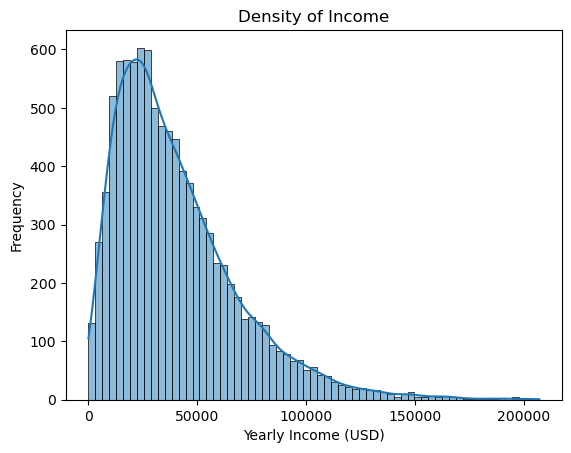

In [8]:
# Using Seaborn to plot distplot of Income
sns.histplot(data = df['Income'], kde=True)
plt.title('Density of Income')
plt.xlabel('Yearly Income (USD)')
plt.ylabel('Frequency');

The above figure shows that the Income variable displays a positively skewed (right-skewed) distribution

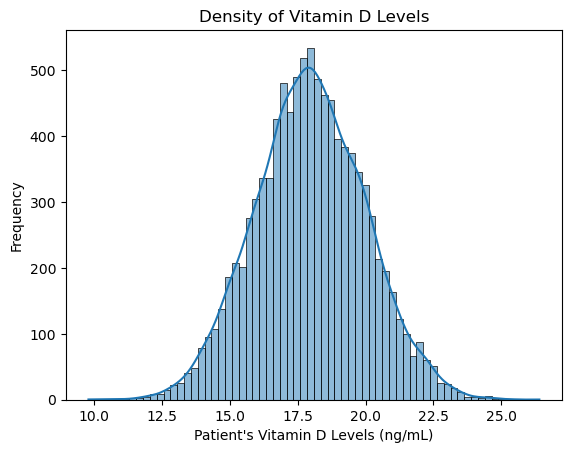

In [9]:
# Using Seaborn to plot distplot of Vitamin D Levels
sns.histplot(data = df['VitD_levels'], kde=True)
plt.title('Density of Vitamin D Levels')
plt.xlabel("Patient's Vitamin D Levels (ng/mL)")
plt.ylabel('Frequency');

The above figure shows that the Vitamin D level variable displays a normal distribution curve

In [34]:
df['Gender'].value_counts()


Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

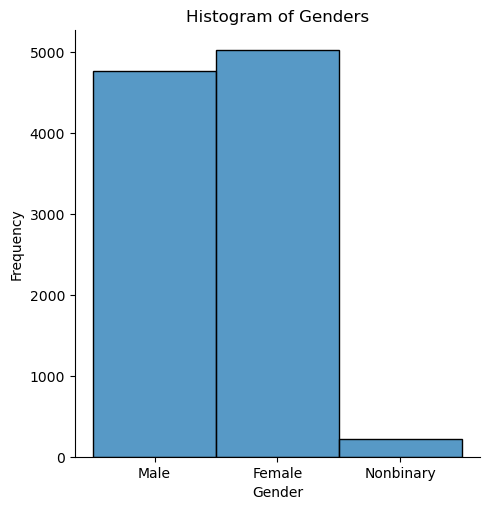

In [10]:
# Using Seaborn to plot histogram of Gender
sns.displot(df['Gender'], kind='hist')
plt.title('Histogram of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency');

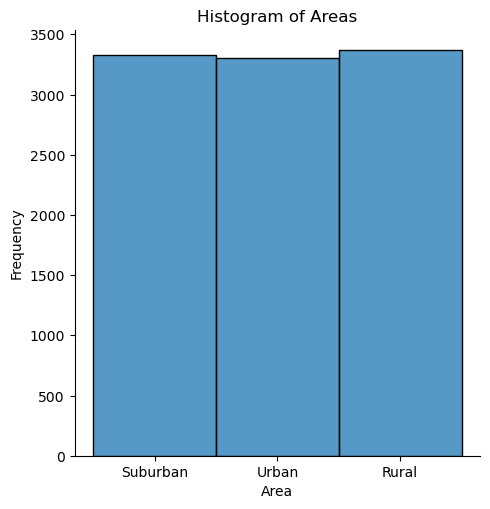

In [11]:
# Using Seaborn to plot histogram of Area
sns.displot(df['Area'], kind='hist')
plt.title('Histogram of Areas')
plt.xlabel('Area')
plt.ylabel('Frequency');

# Bivariate Analysis

We will now be performing bivariate analysis on two continuous variables - in this case, Income and Total-Charge was selected

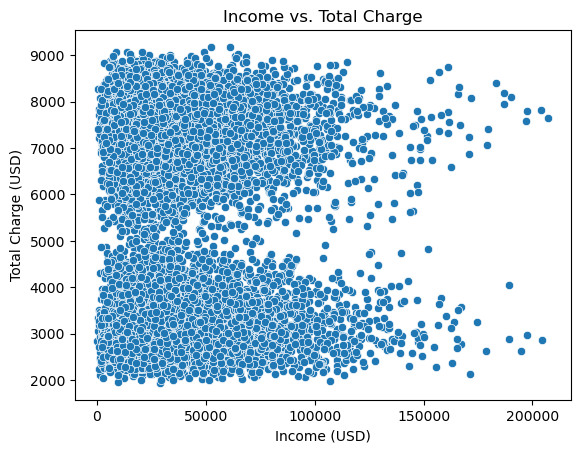

In [12]:
# Using Searbon scatterplot for continuous variables
sns.scatterplot(data=df, x='Income', y='TotalCharge')
plt.title('Income vs. Total Charge')
plt.xlabel('Income (USD)')
plt.ylabel('Total Charge (USD)');

The same will be applied to categorical variables - in this case, Gender and Area were selected.

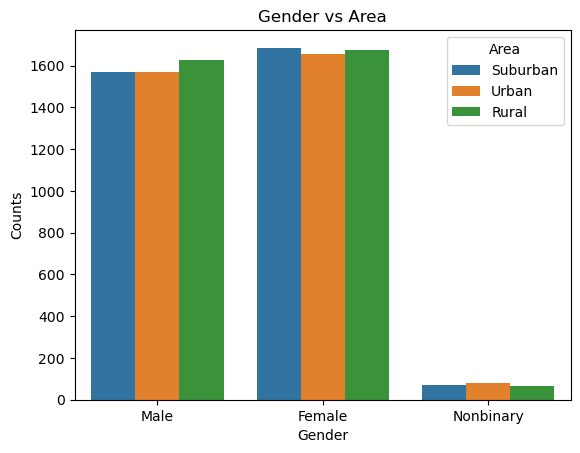

In [33]:
# Plotting Gender vs Area 
sns.countplot(data=df, x='Gender', hue='Area')
plt.title('Gender vs Area')
plt.xlabel('Gender')
plt.ylabel('Counts');